In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pwd
!ls
!cd sample_dat



/content
sample_data
/bin/bash: line 0: cd: sample_dat: No such file or directory


In [ ]:
#import opendatasets as od
#od.download("https://www.kaggle.com/datasets/tongpython/cat-and-dog")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ashhadmuhammedkader
Your Kaggle Key: ··········


100%|██████████| 218M/218M [00:05<00:00, 45.3MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
data_dir_list = os.listdir('/content/cat-and-dog/test_set/test_set/cats')
#print(data_dir_list)

path, dirs, files = next(os.walk("/content/cat-and-dog/test_set/test_set/cats"))
file_count = len(files)
print(file_count)


1012


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/cat-and-dog/training_set/training_set',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/cat-and-dog/test_set/test_set',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
251/251 [==============================] - 40s 110ms/step - loss: 2.0998 - accuracy: 0.5505 - val_loss: 1.2492 - val_accuracy: 0.5210
Epoch 2/10
251/251 [==============================] - 28s 109ms/step - loss: 0.7149 - accuracy: 0.6101 - val_loss: 0.6481 - val_accuracy: 0.6500
Epoch 3/10
251/251 [==============================] - 29s 114ms/step - loss: 0.5998 - accuracy: 0.6881 - val_loss: 0.5562 - val_accuracy: 0.7118
Epoch 4/10
251/251 [==============================] - 29s 113ms/step - loss: 0.5282 - accuracy: 0.7390 - val_loss: 0.5722 - val_accuracy: 0.6945
Epoch 5/10
251/251 [==============================] - 27s 105ms/step - loss: 0.4769 - accuracy: 0.7705 - val_loss: 0.5423 - val_accuracy: 0.7252
Epoch 6/10
251/251 [==============================] - 27s 107ms/step - loss: 0.4138 - accuracy: 0.8117 - val_loss: 0.5884 - val_accuracy: 0.7247
Epoch 7/10
251/251 [==============================] - 27s 108ms/step - loss: 0.3511 - accuracy: 0.8421 - val_loss: 0.5242 - val_ac

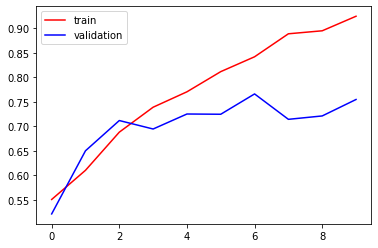

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

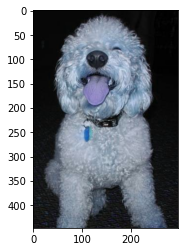

In [ ]:
import cv2
test_img = cv2.imread('/content/cat-and-dog/test_set/test_set/dogs/dog.4003.jpg')
plt.imshow(test_img)


In [ ]:
test_img.shape

(447, 297, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
a=model.predict(test_input)
a[0][0]

1/1 [==============================] - 0s 39ms/step


1.0

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model.save('/content/gdrive/MyDrive/mymodels/cat_and_dog.h5')
